---
- TOÁN ỨNG DỤNG THỐNG KÊ
- Lớp: 22_3
- Họ và tên: Nguyễn Minh Thiện
- MSSV: 22120344
- Đồ án Thực hành Cuối kì
- CÂU 1 DATA FITTING 
---

----------------------------------- MÔ HÌNH DỰ BÁO BỆNH TIỂU ĐƯỜNG -----------------------------------


[ A - MÔ HÌNH SỬ DỤNG PHƯƠNG PHÁP HỒI QUY TUYẾN TÍNH (SỬ DỤNG TOÀN BỘ 7 BIẾN CÒN LẠI) ]
--------------------------------------THÔNG TIN DỮ LIỆU ĐẦU VÀO ----------------------------------------
Gọi x1,x2,x3,x4,x5,x6,x7 lần lượt là các biến: 
x1: RIDAGEYR
x2: RIAGENDR
x3: PAQ605
x4: BMXBMI
x5: LBXGLU
x6: LBXGLT
x7: LBXIN
--------------------------------------------------------------------------------------------------------

f(x1,x2,x3,x4,x5,x6,x7) = 2.0316670739388627 + 0.0005827995219439205 * x1 -0.014351965399920119 * x2 + 0.0004527383849923794 * x3 + 0.0003149172663327593 * x4 -0.00043993213482775625 * x5 + 1.0603782563855385e-05 * x6 + 0.0012553690581364463 * x7 
Chuẩn r = 8.813941060900085


[ B - MÔ HÌNH SỬ DỤNG PHƯƠNG PHÁP HỒI QUY TUYẾN TÍNH (SỬ DỤNG DUY NHẤT 1 BIẾN CHO RA KẾT QUẢ TỐT NHẤT) ]
Gọi x1 là biến trong từng mô hình

Mô hình 1: Dựa trên biến RIDAGEYR
f(x1) = 1.997015

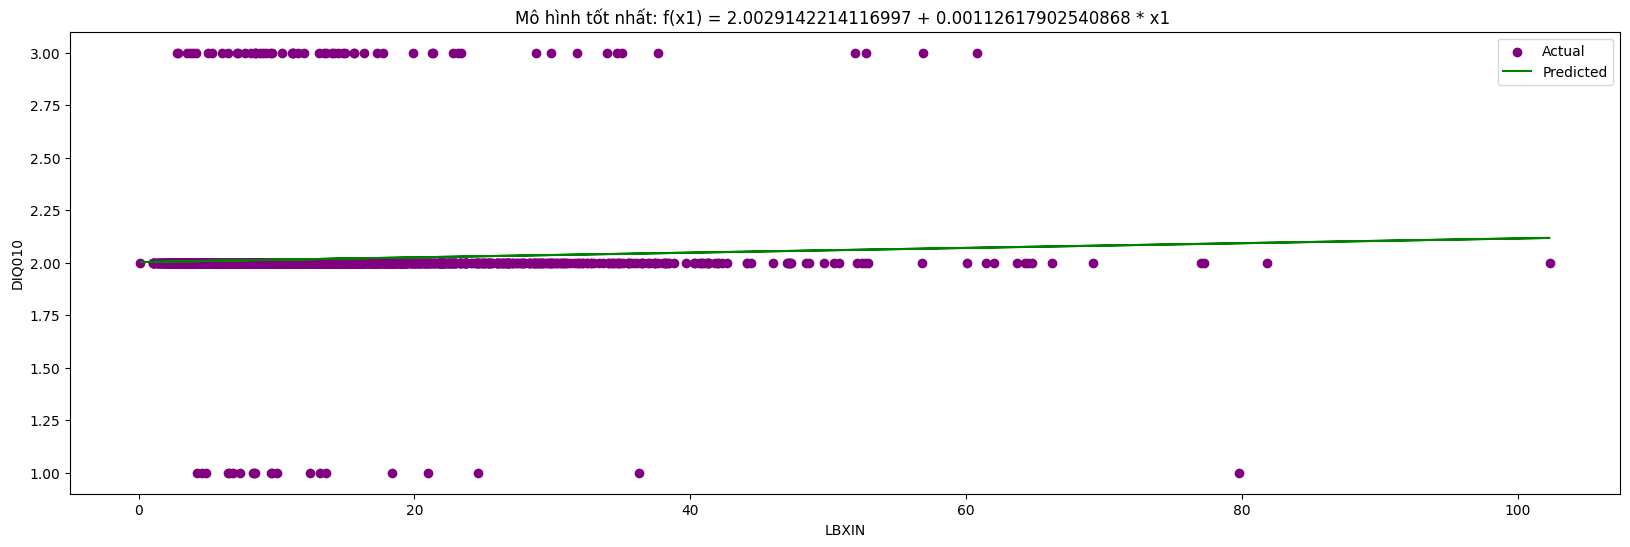



[ C - XÂY DỰNG MÔ HÌNH CÁ NHÂN ]
Mỗi mô hình dự báo bệnh tiểu đường sử dụng phương pháp hồi quy tuyến tính dưới đây đều bỏ đi 1/7 biến để xây dựng. Từ đó tìm ra mô hình có chuẩn nhỏ nhất sẽ là mô hình tốt nhất khi xây dựng bỏ đi biến tương ứng.

Mô hình 1: Không sử dụng biến RIDAGEYR
Gọi x1,x2,x3,x4,x5,x6 lần lượt là các biến: 
x1: RIAGENDR
x2: PAQ605
x3: BMXBMI
x4: LBXGLU
x5: LBXGLT
x6: LBXIN
f(x1,x2,x3,x4,x5,x6) = 2.0380030996417533 -0.014859406308825707 * x1 + 0.0011546237675714721 * x2 + 0.0007241905853511699 * x3 -0.00042783494130477565 * x4 + 9.097376190708977e-05 * x5 + 0.0008855927192704116 * x6 
Chuẩn r = 8.828680345763502

Mô hình 2: Không sử dụng biến RIAGENDR
Gọi x1,x2,x3,x4,x5,x6 lần lượt là các biến: 
x1: RIDAGEYR
x2: PAQ605
x3: BMXBMI
x4: LBXGLU
x5: LBXGLT
x6: LBXIN
f(x1,x2,x3,x4,x5,x6) = 2.010094305475386 + 0.0005914336458196501 * x1 -0.0021509510495044126 * x2 + 0.00017902451436646594 * x3 -0.0003323356090623626 * x4 -1.8567964392583736e-05 * x5 + 0.00131512798288835

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('NHANES_age_prediction.csv')

# Lưu trữ dữ liệu cột "DIQ010" vào biến dataDIQ010
dataDIQ010 = df['DIQ010'].values.tolist()

#Thiết lập cấu trúc df 
#   Bỏ qua biến "SEQN" và "age_group", "DIQ010"
df = df.drop(columns=['SEQN', 'age_group', 'DIQ010'])

#   Chèn cột "DIQ010" vào cột đầu dataframe df
df.insert(0, 'DIQ010', dataDIQ010)

#Đọc file wine.csv vào dataframe df bằng thư viện pandas và thiết lập cấu trúc của df, sau đó chuyển dataframe df 
# thành ma trận bằng hàm values.tolist() và gán vào data (để dễ dàng truy xuất các phần tử sau này).
data = df.values.tolist()


# Quy ước (1): trong đồ án này, các dữ liệu trong ma trận/dataframe 
#  được quy ước cột đầu tiên là biến phụ thuộc, các cột còn lại là biến độc lập.
# Quy ước (2): vector chứa các hệ số ước lượng của mô hình hồi quy 
#  tuyến tính luôn có phần tử đầu tiên là hệ số chặn, các phần tử còn lại là hệ số góc.



# Hàm dùng để sao chép ma trận input ra một ma trận mới và trả về ma trận này trong output
def deepcopyMatrix(A):
    C = []
    for i in range(len(A)):
        temp = []
        for j in range(len(A[i])):
            temp.append(A[i][j]*float(1))
        C.append(temp)
    return C



# Hàm dùng để tạo và trả về ma trận đơn vị cấp n.
def crateIdentityMatrix(n):
    A = []
    for i in range(0,n):
        temp = []
        for j in range(0,n):
            if(i==j):
                temp.append(1.0)
            else:
                temp.append(0.0)            
        A.append(temp)
    return A



#Hàm dùng để tìm và trả về ma trận nghịch đảo của một ma trận vuông cấp n
def inverse(A1):
    
    A = deepcopyMatrix(A1)
    
    # Kiểm tra ma trân có hợp lệ không 

    for i in range(0,len(A)):
        if len(A) != len(A[i]):
            print("Ma trận input không vuông, không thể tìm ma trận nghịch đảo")
            return   
    
    # Tạo ma trận đơn vị In
    B=crateIdentityMatrix(len(A))
        
    
    flag=True
    k=0
    j=0
    
    # Duyệt từng cột của ma trận A
    for i in range(0,len(A[0])):
        k=j
            
        flag=False
        
        # Duyệt từng dòng của cột i để kiểm tra cột đó có  = 0  hay không ?

        for l in range(j,len(A)):
            if A[l][i] != 0:
                flag=True
                
        if flag == True:
            if A[k][i] == 0:
                for z in (k+1,len(A)):
                    if A[z][i] != 0:
                        temp=A[k]
                        A[k]=A[z]
                        A[z]=temp
                        
                        temp=B[k] 
                        B[k]=B[z] 
                        B[z]=temp 
                        break
            d=(float(1)/A[k][i])
            for m in range(0,len(A[0])):
                A[k][m]=A[k][m]*float(d)
                B[k][m]=B[k][m]*float(d)
            
            for k1 in range (0,len(A)):
                if k1==i:
                    continue
                d=-A[k1][i]/float(A[k][i])
                for m in range(0,len(A[0])):
                    A[k1][m]=A[k1][m]+float(d)*A[k][m]
                    B[k1][m]=B[k1][m]+float(d)*B[k][m]
            j=j+1
        else:
            print("Ma trận không khả nghịch")
            return
    return B




# Hàm nhân hai ma trận input (A x B) và trả về ma trận kết quả trong output.
def multiMatrix(A,B):
    if(len(A[0])!=len(B)):
        print("Không thể nhân hai ma trận với nhau!")
        return None
    C=[]
    temp=[]
    ans=0.0
    for i in range(len(A)):
        temp=[]
        for j in range(len(B[0])):
            ans=0.0
            for k in range(len(A[0])):
                ans += A[i][k] * float(B[k][j])
            temp.append(ans)
        C.append(temp)
    return C



# Hàm thực hiện chuyển vị ma trận input và trả về ma trận đã chuyển vị.
def transposeMatrix(A):
    C=[]
    for i in range(len(A[0])):
        temp=[]
        for j in range(len(A)):
            temp.append(A[j][i])
        C.append(temp)
    return C


# Hàm nhận input là một ma trận dữ liệu data đáp ứng quy ước (1), hàm sẽ trả về 
#  vector cột B chứa các hệ số ước lượng của mô hình hồi quy tuyến tính thỏa quy
#  ước (2). 
def linearB(data):
    A = []
    for i in range(len(data)):
        temp=[]
        temp.append(1.0)
        for j in range(1,len(data[i])):
            temp.append(data[i][j])
        A.append(temp)


    Y=[]
    for i in range(len(data)):
        temp=[]
        temp.append(data[i][0])
        Y.append(temp)

    AT=transposeMatrix(A)
    ATA1=multiMatrix(AT,A)

    ATA1=inverse(ATA1)
    ATY=multiMatrix(AT,Y)
    B=multiMatrix(ATA1,ATY)
    return B
    

# Hàm nhận input là vector cột B chứa các hệ số ước lượng của mô hình hồi quy tuyến
#  tính thỏa quy ước **(2)**, hàm sẽ trả về mô hình hồi quy tuyến tính. 
def linearModel(B):

    ans='f(' 

    var=[]
    for i in range(1,len(B)):
        var.append('x'+ str(i))
    for i in range(0,len(var)):
        ans += var[i]
        if i != (len(var)-1):
            ans += ','
    ans += ') = '   
    
    for i in range(len(B)):
        if i==0:
            ans += str(B[i][0])+' '
        else:
            ans += str(B[i][0])+' * '+var[i-1]+' '
        if i!=(len(B)-1):
            if(B[i+1][0] >=0):
                ans += '+ '
    return ans



# Hàm nhận input là vector cột B chứa các hệ số ước lượng của mô hình hồi quy tuyến
#  tính thỏa quy ước **(2)** và một ma trận dữ liệu data thỏa quy ước (1), hàm tính
#  và trả về giá trị dự đoán của biến phụ thuộc y dựa trên các giá trị của biến độc
#  lập trong data bằng mô hình hồi quy tuyến tính.
def solveLinearModule(B,data):
    ans=[]    
    sum=0.0
    for k in range(len(data)):
        temp=[]
        sum=0.0
        for i in range(len(B)):
            if i==0:
                sum += B[i][0]
            else:
                sum += B[i][0]*float(data[k][i])
        temp.append(sum)
        ans.append(temp)
        
    return ans


# Input là ma trận dữ liệu data thỏa quy ước (1), hàm tính và trả về chuẩn của mô
#  hình hồi quy tuyến tính. 
def findR(data):    
    B=linearB(data)
    Y=[]
    for i in range(len(data)):
        temp=[]
        temp.append(data[i][0])
        Y.append(temp)    
    Y1=solveLinearModule(B,data)   
    
    r=[]
    for i in range(len(Y)):
        r.append(Y[i][0]-Y1[i][0])
    ans=0.0
    for i in range(len(r)):
        ans += float(r[i])*r[i]
        
    return (ans**(0.5))

# Hàm trả về vị trí chứa giá trị nhỏ nhất trong một list.
def findMinReturnIndex(l):
    min=l[0]
    index=0
    for i in range(len(l)):
        if(l[i] < min):
            min = l[i]
            index = i
    return index


# Hàm dùng để trích xuất hệ số a và b từ phương trình tuyến tính.
def extractCoefficients(equation):
    # Tìm vị trí dấu '='
    loc = equation.find('=')
    
    # Lấy phần bên phải của dấu '=' và xóa các khoảng trắng thừa
    line = equation[loc + 1:].strip()
    
    # Tách các thành phần của phương trình
    parts = line.split('+')
    
    # Lấy hệ số b
    b = float(parts[0].strip())
    
    # Lấy hệ số a
    a_part = parts[1].strip()
    a = float(a_part.split('*')[0].strip())
    
    return b, a


# Hàm in ra mô hình dự báo bệnh tiểu đường bằng phương pháp hồi quy
#  tuyến tính sử dụng duy nhất 1 biến cho kết quả tốt nhất. 
def printBestModule1Var(data,df):
    
    A1=[]
    for i in range(len(data)):
        temp = []
        temp.append(data[i][0])
        A1.append(temp)
    
    Cl = []
    rl = []
    for i in range(1,len(data[0])):
        A = deepcopyMatrix(A1)
        for j in range (len(data)):
            A[j].append(data[j][i])
            
        print('Mô hình '+str(i)+': Dựa trên biến '+str(df.columns[i]))
        B = linearB(A)
        C = linearModel(B)
        print(C)
        print('Chuẩn r = ',end='')
        r=findR(A)
        print(r)
        print('')
        
        Cl.append(C)
        rl.append(r)
        
    index = findMinReturnIndex(rl)
    print('KẾT LUẬN: Mô hình cho ra kết quả tốt nhất (chuẩn thấp nhất): '+Cl[index]+' khi dựa trên biến '+str(df.columns[index+1]))
    print('Chuẩn r = '+str(rl[index]))
    # Tạo dữ liệu cho đồ thị
    
    x = df[str(df.columns[index+1])]
    y_ac  = df['DIQ010']
    b, a = extractCoefficients(Cl[index])
    y_pred = [a * i + b for i in x]
    # Vẽ đồ thị
    plt.figure(figsize=(20, 6))
    plt.scatter(x, y_ac, color='purple', label='Actual')
    plt.plot(x, y_pred, color='green', label='Predicted')

    # Đặt tiêu đề cho đồ thị và các trục
    plt.title('Mô hình tốt nhất: ' + Cl[index])
    plt.xlabel(str(df.columns[index+1]))
    plt.ylabel('DIQ010')
    plt.legend()
    plt.show()
    return


# Hàm in ra các mô hình cá nhân dự báo bệnh tiểu đường bằng phương
#  pháp hồi quy tuyến tính sử dụng 10/11 biến và kết luận mô hình
#  cho ra kết quả tốt nhất. Input là ma trận dữ liệu data và dataframe
#  df thỏa quy ước (1)
def printBestModuleCustom(data,df):    
    Cl=[]
    rl=[]
    for i in range(1,len(data[0])):
        dropname=str(df.columns[i])    
        df2 = df.drop(df.columns[[ i]],axis = 1)
        data2= df2.values.tolist()
            
        print('Mô hình '+str(i)+': Không sử dụng biến '+dropname)
        print('Gọi x1,x2,x3,x4,x5,x6 lần lượt là các biến: ')
        for j in range(1,len(df2.columns)):
            print('x'+str(j)+': '+str(df2.columns[j]))
            
        B=linearB(data2)
        C=linearModel(B)
        print(C)
        print('Chuẩn r = ',end='')
        r=findR(data2)
        print(r)
        print('')
        
        Cl.append(C)
        rl.append(r)
    index=findMinReturnIndex(rl)
    print('KẾT LUẬN: Mô hình cho ra kết quả tốt nhất (chuẩn thấp nhất): '+Cl[index]+' khi không sử dụng biến '+str(df.columns[index+1]))
    print('Chuẩn r = '+str(rl[index]))
    return



#--------------------------Test case-----------------------   


print('----------------------------------- MÔ HÌNH DỰ BÁO BỆNH TIỂU ĐƯỜNG -----------------------------------')
print('')
print('')
print('[ A - MÔ HÌNH SỬ DỤNG PHƯƠNG PHÁP HỒI QUY TUYẾN TÍNH (SỬ DỤNG TOÀN BỘ 7 BIẾN CÒN LẠI) ]')
print('--------------------------------------THÔNG TIN DỮ LIỆU ĐẦU VÀO ----------------------------------------')
print('Gọi x1,x2,x3,x4,x5,x6,x7 lần lượt là các biến: ')
print('x1: RIDAGEYR')
print('x2: RIAGENDR')
print('x3: PAQ605')
print('x4: BMXBMI')
print('x5: LBXGLU')
print('x6: LBXGLT')
print('x7: LBXIN')
print('--------------------------------------------------------------------------------------------------------')
print('')



B=linearB(data)
C=linearModel(B)
print(C)
print('Chuẩn r = ',end='')
r=findR(data)
print(r)

print('')
print('')
print('[ B - MÔ HÌNH SỬ DỤNG PHƯƠNG PHÁP HỒI QUY TUYẾN TÍNH (SỬ DỤNG DUY NHẤT 1 BIẾN CHO RA KẾT QUẢ TỐT NHẤT) ]')
print('Gọi x1 là biến trong từng mô hình')
print('')
printBestModule1Var(data,df)




print('')
print('')
print('[ C - XÂY DỰNG MÔ HÌNH CÁ NHÂN ]')
print('Mỗi mô hình dự báo bệnh tiểu đường sử dụng phương pháp hồi quy tuyến tính dưới đây đều bỏ đi 1/7 biến để xây dựng. Từ đó tìm ra mô hình có chuẩn nhỏ nhất sẽ là mô hình tốt nhất khi xây dựng bỏ đi biến tương ứng.')

print('')

printBestModuleCustom(data,df)

print('')
print('Nhận xét: Các mô hình cá nhân tự xây dựng đều không tốt bẳng mô hình sử dụng cả 7 biến. Nhưng sau nhiều mô hình thử nghiệm thì rút ra được mô hình ở kết luận phía trên là mô hình cá nhân tốt nhất.')

